In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl")

hjbsolver_delta1 (generic function with 1 method)

In [2]:
p = 120.0;
k = (0.05 / 1.25) * p;
δ = 0.15;

function FR12(x, a2, a1)
    if x < a2
        return 1 -
               (0.5 * a1 * exp(-0.5 * x / a1) - exp(-0.25 * x)) /
               (0.5 * a1 - 1)
    else
        return 1 -
               (0.5 * a1 - exp((0.5 / a1 - 0.25) * a2)) *
               exp(-0.5 * x / a1) / (0.5 * a1 - 1)
    end
end

F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
#F2 = SampleDistFun(x -> cdf(Weibull(0.5, 2), x), 40.0, 0.005)
F2(x) = 1 - exp(-0.7071067812 * sqrt(x))


function FR1(x, a)
    if x < a
        return F1(x)
    else
        return 1.0
    end
end
FR2(x, a2) = F2(x / a2)

FR(r, x) =
    0.3333333333333333 * FR1(x, r[1]) +
    0.4 * FR2(x, r[2]) +
    0.26666666666666666 * FR12(x, r[1], r[2])

function ER1(a) ###Gamma
    beta = 1.25
    return (-a^2 * beta^2 - 4 * a * beta + 6 * exp(a * beta) - 6) *
           exp(-a * beta) / (2 * beta)
end

ER2(a2) = 4 * a2
function ER12(a1, a2)
    beta1 = 0.25
    # beta2=0.5
    return 1 / beta1 - exp(-a1 * beta1) / beta1 + 2 * a2
end
ER(r) =
    0.3333333333333333 * ER1(r[1]) +
    0.4 * ER2(r[2]) +
    0.26666666666666666 * ER12(r[1], r[2])

EnoR = ER([200.0, 1.0])

4.0

In [3]:
res = bisection_hjbsolver(
    a=166.0,
    b=333.0,
    max_it=20,
    NRe=2,
    β=5.0 + 6.0 + 4.0,
    FR=FR,
    ER=ER,
    EnoR=EnoR,
    partition=(0.0, 10.0, 200.0, 500.0),
    Δx=0.05,
    SearchRanges=(
        [(0.001, 200.0), (0.001, 1.0)],
        [(0.0, 200.0), (0.0, 1.0)],
    ),
    η=0.25,
    η1=0.3,
    δ=0.15,
    MaxEvals=3000,
    p=p,
    L=300,
)

(166.0, 249.5, 333.0)
10%, V(50.0) = 1084.4   Time = 336.0 seconds
20%, V(100.0) = 1559.9   Time = 1300.0 seconds
30%, V(150.0) = 2036.0   Time = 2920.0 seconds
40%, V(200.0) = NaN   Time = 5590.0 seconds
50%, V(250.0) = NaN   Time = 5590.0 seconds
60%, V(300.0) = NaN   Time = 5590.0 seconds
70%, V(350.0) = NaN   Time = 5600.0 seconds
80%, V(400.0) = NaN   Time = 5600.0 seconds
90%, V(450.0) = NaN   Time = 5600.0 seconds
100%, V(500.0) = NaN   Time = 5600.0 seconds


1-element Vector{Any}:
 (0.0:0.05:500.0, [249.5, 251.87386008184208, 254.27096783315926, 256.636064833586, 258.98275230513747, 261.3175008091398, 263.6440067385865, 265.9645365825244, 268.2805051494088, 270.5927742549366  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [47.47720163684174, 47.942155026343464, 47.30194000853386, 46.93374943102988, 46.69497008004612, 46.53011858893349, 46.410596878757666, 46.319371337687976, 46.24538211055623, 46.18104547388762  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [188.25550805806407 1.0; 161.82660411257947 1.0; … ; 124.21389351045559 0.39332645590184084; 124.21389351045559 0.39332645590184084], 0)

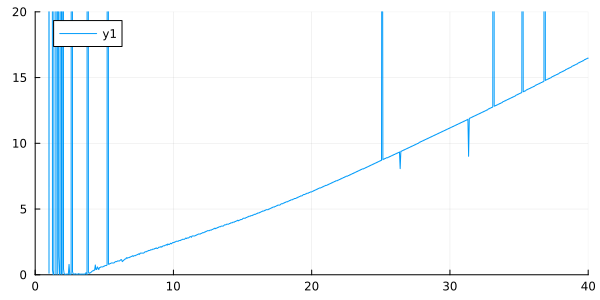

In [4]:
plot(
    res[end][1],
    res[end][4][:, 1],
    size = (600, 300),
    xlims = (0, 40),
    ylims = (0, 20),
)

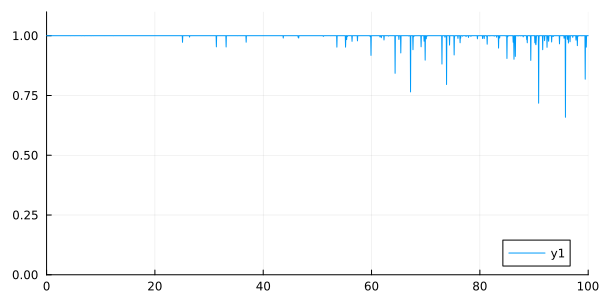

In [5]:
plot(
    res[end][1],
    res[end][4][:, 2],
    size = (600, 300),
    xlims = (0, 100),
    ylims = (0, 1.1),
)

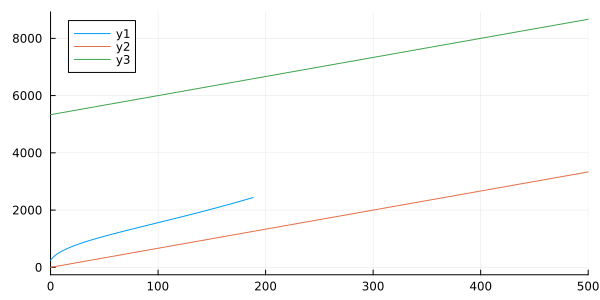

In [6]:
plot(res[1][1], res[1][2], size=(600, 300))
for i = 2:length(res)
    plot!(res[i][1], res[i][2], size=(600, 300))
end
plot!(x -> x / δ, xlims=(0, 500))
plot!(x -> x / δ + p / δ^2, xlims=(0, 500))